<a href="https://www.kaggle.com/code/averma111/pytorch-binary-classification?scriptVersionId=128210652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [24]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Reading the dataset

train_spine = pd.read_csv("/kaggle/input/lower-back-pain-symptoms-datasetlabelled/Dataset_spine.csv")
train_spine.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [26]:
train_spine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [27]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [28]:
summary('train_spine',train_spine)

train_spine shape: (310, 13)


,dtypes,null,unique,min,median,max,mean,std
pelvic_incidence,float64,0,310,26.147921,58.691038,129.834041,60.496653,17.236520
pelvic_tilt,float64,0,310,-6.554948,16.357689,49.431864,17.542822,10.008330
lumbar_lordosis_angle,float64,0,280,14.0,49.562398,125.742385,51.930930,18.554064
sacral_slope,float64,0,281,13.366931,42.404912,121.429566,42.953831,13.423102
pelvic_radius,float64,0,310,70.082575,118.268178,163.071041,117.920655,13.317377
degree_spondylolisthesis,float64,0,310,-11.058179,11.767934,418.543082,26.296694,37.559027
pelvic_slope,float64,0,310,0.00322,0.475989,0.998827,0.472979,0.285787
direct_tilt,float64,0,310,7.027,21.907150,36.7439,21.321526,8.639423
thoracic_slope,float64,0,310,7.0378,12.938450,19.324,13.064511,3.399713
cervical_tilt,float64,0,310,7.0306,11.953835,16.82108,11.933317,2.893265


<AxesSubplot: xlabel='Class_att', ylabel='count'>

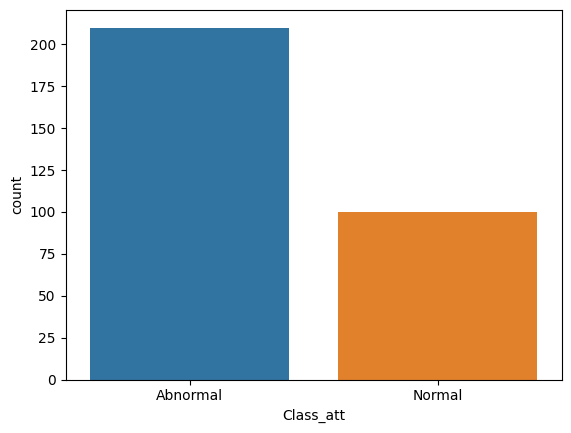

In [29]:
# Check number of Normal and Abnormal entires
sns.countplot(x=train_spine['Class_att'], data=train_spine)

In [30]:
# Encode the target column 
# PyTorch supports labels starting from 0. That is [0, n]. We need to remap our labels to start from 0.

encoded_target = {
    'Abnormal':0,
    'Normal':1
}

# Cast target column as category
train_spine['Class_att'] = train_spine['Class_att'].astype('category')

#Replace the Abnorml and Normal with encoded_target
train_spine['Class_att'].replace(encoded_target,inplace=True)


In [31]:
train_spine.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [32]:
# Define the features and target column
X = train_spine.iloc[:,0:-2]
y = train_spine.iloc[:,-2]

In [33]:
# Split the data into training and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((248, 11), (62, 11), (248,), (62,))

In [34]:
## Standardize/Normalize the inputs =>https://www.jeremyjordan.me/batch-normalization/
#For neural networks to train properly, we need to standardize the input values. 
#We standardize features by removing the mean and scaling to unit variance. T
#he standard score of a sample x where the mean is u and the standard deviation is s is calculated as
#Z = (X - u) / S
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
# Model Parameters 
EPOCHS = 500
BATCH_SIZE = 32
LEARNING_RATE = 1e-4

In [36]:
# Define the DataLoader for train and test data
from torch.utils.data import Dataset, DataLoader


# Train Data
class TrainData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
# Test Data   
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
    


In [37]:
# Instantiate the Train and Test data class
import torch
train_data = TrainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
test_data = TestData(torch.FloatTensor(X_test))

In [38]:
# Initialize the DataLoader 
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

### The only thing you need to ensure is that number of output features of one layer should be equal to the input features of the next layer.

#### The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

#### Batch Norm is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.

In [39]:
import torch

class BinaryClassificationNNet(torch.nn.Module):
    def __init__(self,input_features):
        super(BinaryClassificationNNet,self).__init__()
        # Number of input features is 12.
        self.input_layer = torch.nn.Linear(input_features,64)
        self.dense_layer = torch.nn.Linear(64,64)
        self.output_layer = torch.nn.Linear(64,1)
        
        self.relu = torch.nn.ReLU()
        self.dropout = torch.nn.Dropout(p=0.1)
        self.batchnorm_1 = torch.nn.BatchNorm1d(64)
        self.batchnorm_2 = torch.nn.BatchNorm1d(64)
        
    
    def forward(self,inputs):
        x = self.relu(self.input_layer(inputs))
        x = self.batchnorm_1(x)
        x = self.relu(self.dense_layer(x))
        x = self.batchnorm_2(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        
        return x

In [40]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [41]:
model = BinaryClassificationNNet(X_train.shape[1])
model.to(device)
print(model)

BinaryClassificationNNet(
  (input_layer): Linear(in_features=11, out_features=64, bias=True)
  (dense_layer): Linear(in_features=64, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm_2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [42]:
# Define the loss and optimizer 
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [43]:
# Define the accuracy function 

def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    accuracy = correct_results_sum/y_test.shape[0]
    accuracy = torch.round(accuracy * 100)
    
    return accuracy

In [44]:
# Tain the model
from tqdm.notebook import tqdm

model.train()
for e in tqdm(range(1, EPOCHS+1)):
    epoch_loss = 0
    epoch_acc = 0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        #print(y_batch.unsqueeze(1))
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch 001: | Loss: -0.75534 | Acc: 0.000
Epoch 002: | Loss: -1.08307 | Acc: 0.000
Epoch 003: | Loss: -0.35720 | Acc: 0.000
Epoch 004: | Loss: -1.15188 | Acc: 0.000
Epoch 005: | Loss: -0.94803 | Acc: 0.000
Epoch 006: | Loss: -1.39992 | Acc: 0.000
Epoch 007: | Loss: -1.23152 | Acc: 0.000
Epoch 008: | Loss: -2.38630 | Acc: 0.000
Epoch 009: | Loss: -2.19795 | Acc: 0.000
Epoch 010: | Loss: -2.03550 | Acc: 0.000
Epoch 011: | Loss: -2.59924 | Acc: 0.000
Epoch 012: | Loss: -2.56188 | Acc: 0.000
Epoch 013: | Loss: -2.61394 | Acc: 0.000
Epoch 014: | Loss: -2.81655 | Acc: 0.000
Epoch 015: | Loss: -2.89255 | Acc: 0.000
Epoch 016: | Loss: -2.90609 | Acc: 0.000
Epoch 017: | Loss: -2.90941 | Acc: 0.000
Epoch 018: | Loss: -3.87936 | Acc: 0.000
Epoch 019: | Loss: -3.12902 | Acc: 0.000
Epoch 020: | Loss: -3.73950 | Acc: 0.000
Epoch 021: | Loss: -3.49479 | Acc: 0.000
Epoch 022: | Loss: -3.94771 | Acc: 0.000
Epoch 023: | Loss: -4.18846 | Acc: 0.000
Epoch 024: | Loss: -3.99400 | Acc: 0.000
Epoch 025: | Los

In [47]:
# Evaluate the model

y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

### Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_list)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred_list))